<a href="https://colab.research.google.com/github/vvicky30/machine-learning/blob/supervised-ml/ANN_Bank_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#loading data using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
df=pd.read_csv('http://13.234.66.67/summer19/datasets/bank.csv')     #loading data set of bank

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


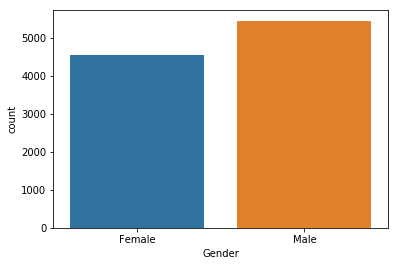

In [5]:
sb.countplot(df['Gender']) #for analysing gender's ratio

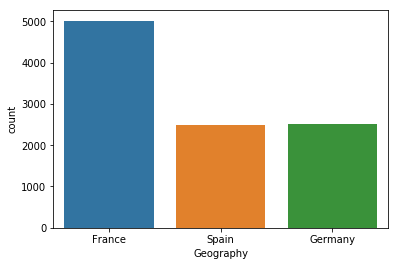

In [6]:
#now for comparing countries
sb.countplot(df['Geography'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd98b3a940>,
      dtype=object)

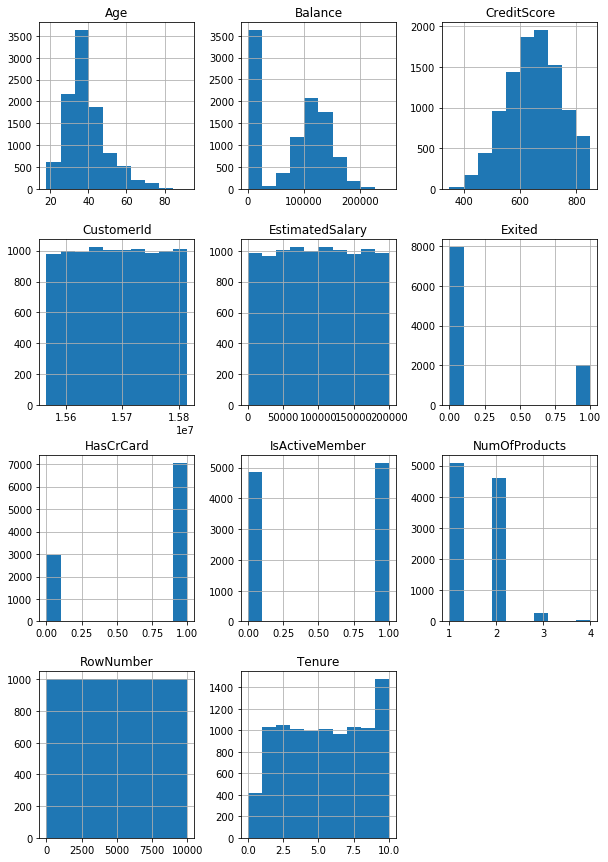

In [7]:
df.hist(figsize=(10,15))   #histogram for all attributes

In [0]:
#features and label of data
features=df.iloc[0:,3:13].values

In [9]:
features

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [0]:
#bank exit status called as label
label=df.iloc[:,13].values

In [11]:
label

array([1, 0, 1, ..., 1, 1, 0])

In [0]:
#to convert string data into numeric ..we can apply labelencoding 
from sklearn.preprocessing import LabelEncoder

In [0]:
countenc=LabelEncoder()#fuction call

In [0]:
features[0:,1]=countenc.fit_transform(features[0:,1])

In [15]:
features

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [0]:
#same for gender
features[0:,2]=countenc.fit_transform(features[0:,2])

In [17]:
features

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [0]:
#creating dummy variables using onehot encoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
#calling function
counthot=OneHotEncoder(categorical_features=[1])  #supply first coulumn

In [20]:
#fit and tranform
features=counthot.fit_transform(features).toarray()
features.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(10000, 12)

In [21]:

features1=features[:,1:]
features1

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [22]:
#checking shape
features1.shape

(10000, 11)

In [0]:
# training and testing split
from sklearn.model_selection import train_test_split
X,x,Y,y=train_test_split(features1,label,test_size=0.2)

In [0]:
# feature Scaling
from sklearn.preprocessing import  StandardScaler

In [0]:
sc=StandardScaler() #calling scaling function

In [0]:
# training data scale
X=sc.fit_transform(X)

In [0]:
 #testing data transform
x=sc.transform(x)

In [29]:
#X
x.shape

(2000, 11)

**NOW** **WE** **CAN** **MAKE** **ANN** **-MODEL**   

In [30]:
import keras # this is the way of using tensorflow in background

Using TensorFlow backend.


In [0]:
# keras ANN model library import
from keras.models import Sequential

In [0]:
# filling data in each layer --
from keras.layers import Dense
# this will give the method to decide activation function and number of nodes in each layer
# including input, hidden and output layer

In [0]:
# now we can design Model
model= Sequential()

In [0]:
# now we can web add input layer
model.add(Dense(6,input_shape=(11,),activation="relu"))
# relu -- means rectifier activation functuina

In [0]:
# adding one more hidden layer
model.add(Dense(6,activation='relu'))
# now we don't have to assign numbers of inputs after first/ input layer

In [0]:
# final layer adding
model.add(Dense(1,activation='sigmoid'))

In [0]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
# optimizer -- weight adjust method -- stochitis g d (adam)

In [47]:
# training data fit 
model.fit(X,Y,batch_size=200,epochs=100)

Epoch 1/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.3370 - acc: 0.8609
Epoch 2/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.3370 - acc: 0.8619
Epoch 3/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3371 - acc: 0.8610
Epoch 4/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.3370 - acc: 0.8599
Epoch 5/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.3371 - acc: 0.8606
Epoch 6/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.3371 - acc: 0.8619
Epoch 7/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.3370 - acc: 0.8609
Epoch 8/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.3370 - acc: 0.8606
Epoch 9/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.3372 - acc: 0.8614
Epoch 10/100
8000/8000 [==============================] - 0s 7us/step - loss: 0.3370 - acc: 0.8609
Epoch 11/100
8000/8

In [48]:
#now wecan test the model
model.predict(x)

array([[0.06244323],
       [0.12157506],
       [0.11052313],
       ...,
       [0.03002909],
       [0.21440884],
       [0.6487509 ]], dtype=float32)

In [0]:
# accuracy score -- confusion matrix